# BT4012 Fraud Analytics Project - EDA

Project Aim: To develop a machine learning–based system that can accurately detect fraudulent behaviour using both loan application data and customer transaction records.

## Imports and Configs

In [78]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load Datasets

In [79]:
data_dir = "."

loan_path = os.path.join(data_dir, "loan_applications.csv")
txn_path = os.path.join(data_dir, "transactions.csv")

loan_df = pd.read_csv(loan_path)
txn_df = pd.read_csv(txn_path)

loan_rows = loan_df.shape[0]
txn_rows = txn_df.shape[0]
print("Number of Rows in Loan Applications Dataset:", loan_rows)
print("Number of Rows in Transactions Dataset:", txn_rows)

display(loan_df.head())
display(txn_df.head())

Number of Rows in Loan Applications Dataset: 50000
Number of Rows in Transactions Dataset: 50000


,application_id,customer_id,application_date,loan_type,loan_amount_requested,loan_tenure_months,interest_rate_offered,purpose_of_loan,employment_status,monthly_income,...,existing_emis_monthly,debt_to_income_ratio,property_ownership_status,residential_address,applicant_age,gender,number_of_dependents,loan_status,fraud_flag,fraud_type
0,c8bf0bea-70e6-4870-9125-41b8210c527f,CUST109427,2023-04-09,Business Loan,604000.0,12,11.66,Medical Emergency,Retired,34700.0,...,1100.0,3.17,Rented,"94/31, Sehgal Zila, Vadodara-380521, Anantapur...",28,Female,3,Approved,0,NaN
1,91224cec-3544-4bc7-ac15-a9792da54c02,CUST106146,2023-09-23,Car Loan,100000.0,240,13.62,Education,Unemployed,51600.0,...,0.0,0.00,Owned,"H.No. 00, Sheth Chowk, Ichalkaranji 006728, Im...",44,Other,3,Approved,0,NaN
2,4efcd02d-4a03-4ab7-9bd1-0ff430493d0c,CUST100674,2023-05-22,Education Loan,431000.0,60,11.40,Medical Emergency,Self-Employed,14800.0,...,4600.0,31.08,Rented,"H.No. 81, Dutta Path, Kozhikode-340301, Tadepa...",56,Other,4,Approved,0,NaN
3,a61337d4-ba04-4a68-b492-2cb8266e6ed7,CUST106466,2024-07-09,Car Loan,324000.0,120,10.36,Debt Consolidation,Self-Employed,28800.0,...,4000.0,13.89,Rented,"H.No. 022, Rege Road, Tiruvottiyur-927857, Aur...",27,Other,4,Declined,0,NaN
4,a8d1639e-170b-41b2-826a-55c7dae38d16,CUST112319,2023-11-20,Personal Loan,100000.0,36,14.14,Business Expansion,Salaried,43900.0,...,1100.0,2.51,Rented,"85/24, Bali Zila, Sambalpur 922071, Tumkur, Ke...",50,Other,0,Declined,0,NaN


,transaction_id,customer_id,transaction_date,transaction_type,transaction_amount,merchant_category,merchant_name,transaction_location,account_balance_after_transaction,is_international_transaction,device_used,ip_address,transaction_status,transaction_source_destination,transaction_notes,fraud_flag
0,2d7ddfd4-1112-4354-a2dd-fad94b45a850,CUST102188,2022-01-04 11:27:00,Bill Payment,2100.0,Dining,"Rattan, Khanna and Magar","Srikakulam, Himachal Pradesh",8211.0,0,Web,31.102.21.141,Success,BCHG80012468703731,Payment for Dining,0
1,ba998721-a612-4e0a-8354-46d001e9c39c,CUST107144,2022-01-03 23:52:00,UPI,1400.0,Travel,Chauhan LLC,"Giridih, Manipur",12858.0,0,Web,176.48.222.166,Success,CJPZ11841095072972,Payment for Travel,0
2,0b4ad8e2-40ac-49c9-b59a-c9efaaccc7a6,CUST102126,2022-01-15 06:54:00,Debit Card,1000.0,Entertainment,Halder-Sarma,"Avadi, Kerala",19268.0,0,ATM,181.62.105.161,Success,TLCG50761416960179,Payment for Entertainment,0
3,c4fce988-34c5-48db-8686-bfad0b3bc0b5,CUST109887,2022-01-08 07:57:00,Credit Card,10500.0,Utilities,"Anand, Khare and Balakrishnan","Navi Mumbai, Maharashtra",29585.0,0,ATM,121.157.246.80,Success,PRZJ55096553432036,Payment for Utilities,0
4,f9b8ca30-00e5-4322-8cff-eac0554cf2da,CUST108620,2022-01-02 10:43:00,Loan Disbursement,8100.0,Electronics,Zacharia and Sons,"Visakhapatnam, Gujarat",0.0,0,ATM,129.96.5.57,Success,NBAI29021393288369,Payment for Electronics,0


In [80]:
# Information about loan applications dataset
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   application_id             50000 non-null  object 
 1   customer_id                50000 non-null  object 
 2   application_date           50000 non-null  object 
 3   loan_type                  50000 non-null  object 
 4   loan_amount_requested      50000 non-null  float64
 5   loan_tenure_months         50000 non-null  int64  
 6   interest_rate_offered      50000 non-null  float64
 7   purpose_of_loan            50000 non-null  object 
 8   employment_status          50000 non-null  object 
 9   monthly_income             50000 non-null  float64
 10  cibil_score                50000 non-null  int64  
 11  existing_emis_monthly      50000 non-null  float64
 12  debt_to_income_ratio       50000 non-null  float64
 13  property_ownership_status  50000 non-null  obj

In [81]:
# Information about transactions dataset
txn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   transaction_id                     50000 non-null  object 
 1   customer_id                        50000 non-null  object 
 2   transaction_date                   50000 non-null  object 
 3   transaction_type                   50000 non-null  object 
 4   transaction_amount                 50000 non-null  float64
 5   merchant_category                  50000 non-null  object 
 6   merchant_name                      50000 non-null  object 
 7   transaction_location               50000 non-null  object 
 8   account_balance_after_transaction  50000 non-null  float64
 9   is_international_transaction       50000 non-null  int64  
 10  device_used                        50000 non-null  object 
 11  ip_address                         50000 non-null  obj

In [82]:
# Checking for duplicate entries
loan_df.duplicated().sum()

np.int64(0)

In [83]:
# Checking for duplicate entries
txn_df.duplicated().sum()

np.int64(0)

There are no duplicated entries in both datasets, indicating each record in the dataset is unique, which is a positive sign for data quality.

## Exploratory Data Analysis (EDA)


In [84]:
# Descriptive statistics
print("\nLoan data info:")
display(loan_df.describe(include="all").T.head(20))

print("\nTransactions data info:")
display(txn_df.describe(include="all").T.head(20))


Loan data info:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
application_id,50000,50000,c8bf0bea-70e6-4870-9125-41b8210c527f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,50000,18314,CUST100339,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
application_date,50000,1096,2024-05-26,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_type,50000,5,Home Loan,10056,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount_requested,50000.0,NaN,NaN,NaN,513913.04,275212.571219,100000.0,300000.0,503000.0,701000.0,1618000.0
loan_tenure_months,50000.0,NaN,NaN,NaN,121.3884,121.4104,12.0,24.0,60.0,240.0,360.0
interest_rate_offered,50000.0,NaN,NaN,NaN,10.528547,1.926442,7.0,9.15,10.51,11.85,19.62
purpose_of_loan,50000,7,Home Renovation,7230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_status,50000,6,Retired,8534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
monthly_income,50000.0,NaN,NaN,NaN,50844.94,23874.742237,10000.0,33600.0,50300.0,67300.0,162000.0



Transactions data info:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transaction_id,50000,50000,2d7ddfd4-1112-4354-a2dd-fad94b45a850,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
customer_id,50000,18318,CUST110321,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_date,50000,30012,2022-01-24 01:48:00,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_type,50000,10,Debit Card,5088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_amount,50000.0,NaN,NaN,NaN,5005.674329,5070.810305,100.0,1400.0,3461.50591,6900.0,76531.610223
merchant_category,50000,12,Utilities,4256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
merchant_name,50000,35312,Kala Inc,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transaction_location,50000,8823,"Ghaziabad, Maharashtra",22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_balance_after_transaction,50000.0,NaN,NaN,NaN,21930.235669,14621.954095,0.0,9237.0,21586.5,33994.25,89097.0
is_international_transaction,50000.0,NaN,NaN,NaN,0.01044,0.101643,0.0,0.0,0.0,0.0,1.0


In [85]:
# Check class counts for target variable - loan_df
print(loan_df["fraud_flag"].value_counts(normalize=True) * 100)

fraud_flag
0    97.948
1     2.052
Name: proportion, dtype: float64


In [86]:
# Check class counts for target variable - transactions_df
print(txn_df["fraud_flag"].value_counts(normalize=True) * 100)

fraud_flag
0    98.996
1     1.004
Name: proportion, dtype: float64


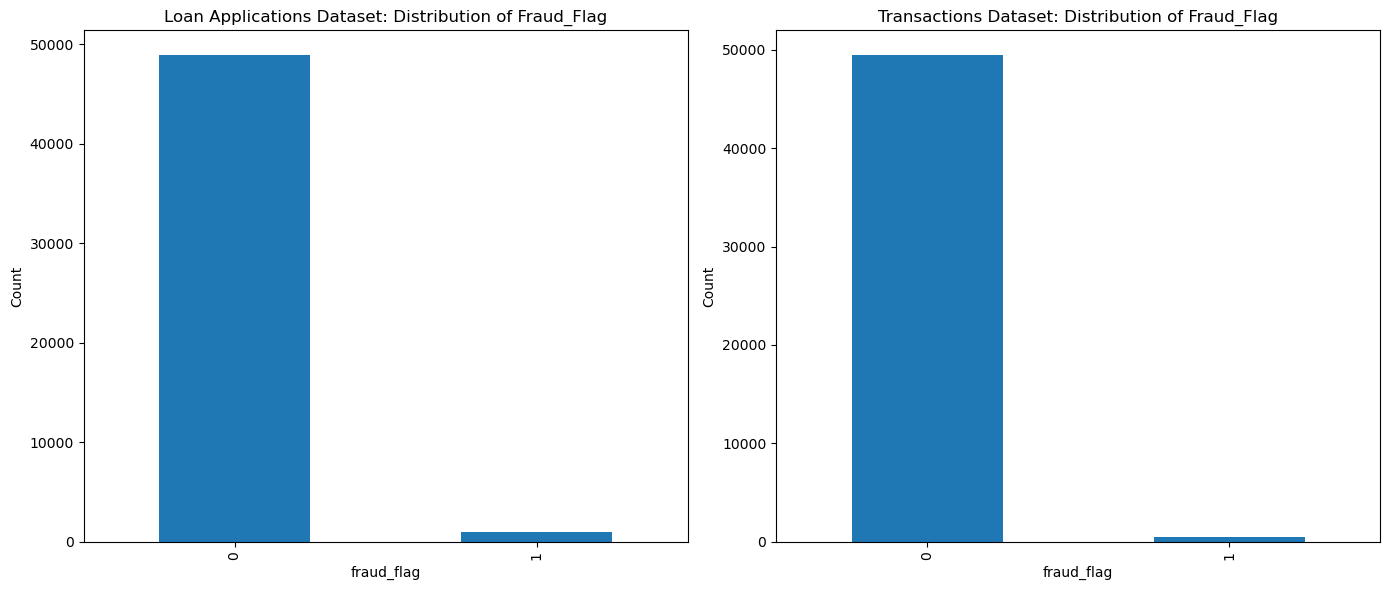

In [87]:
# Bar chart showing target variable distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

loan_df["fraud_flag"].value_counts().plot(kind="bar", ax=axes[0])
axes[0].set_title("Loan Applications Dataset: Distribution of Fraud_Flag")
axes[0].set_ylabel("Count")

txn_df["fraud_flag"].value_counts().plot(kind="bar", ax=axes[1])
axes[1].set_title("Transactions Dataset: Distribution of Fraud_Flag")
axes[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

Both loan applications dataset and transactions dataset show severe class imbalance in the target variable (fraud_flag), which should be handled to prevent biased model training and improve fraud detection performance.

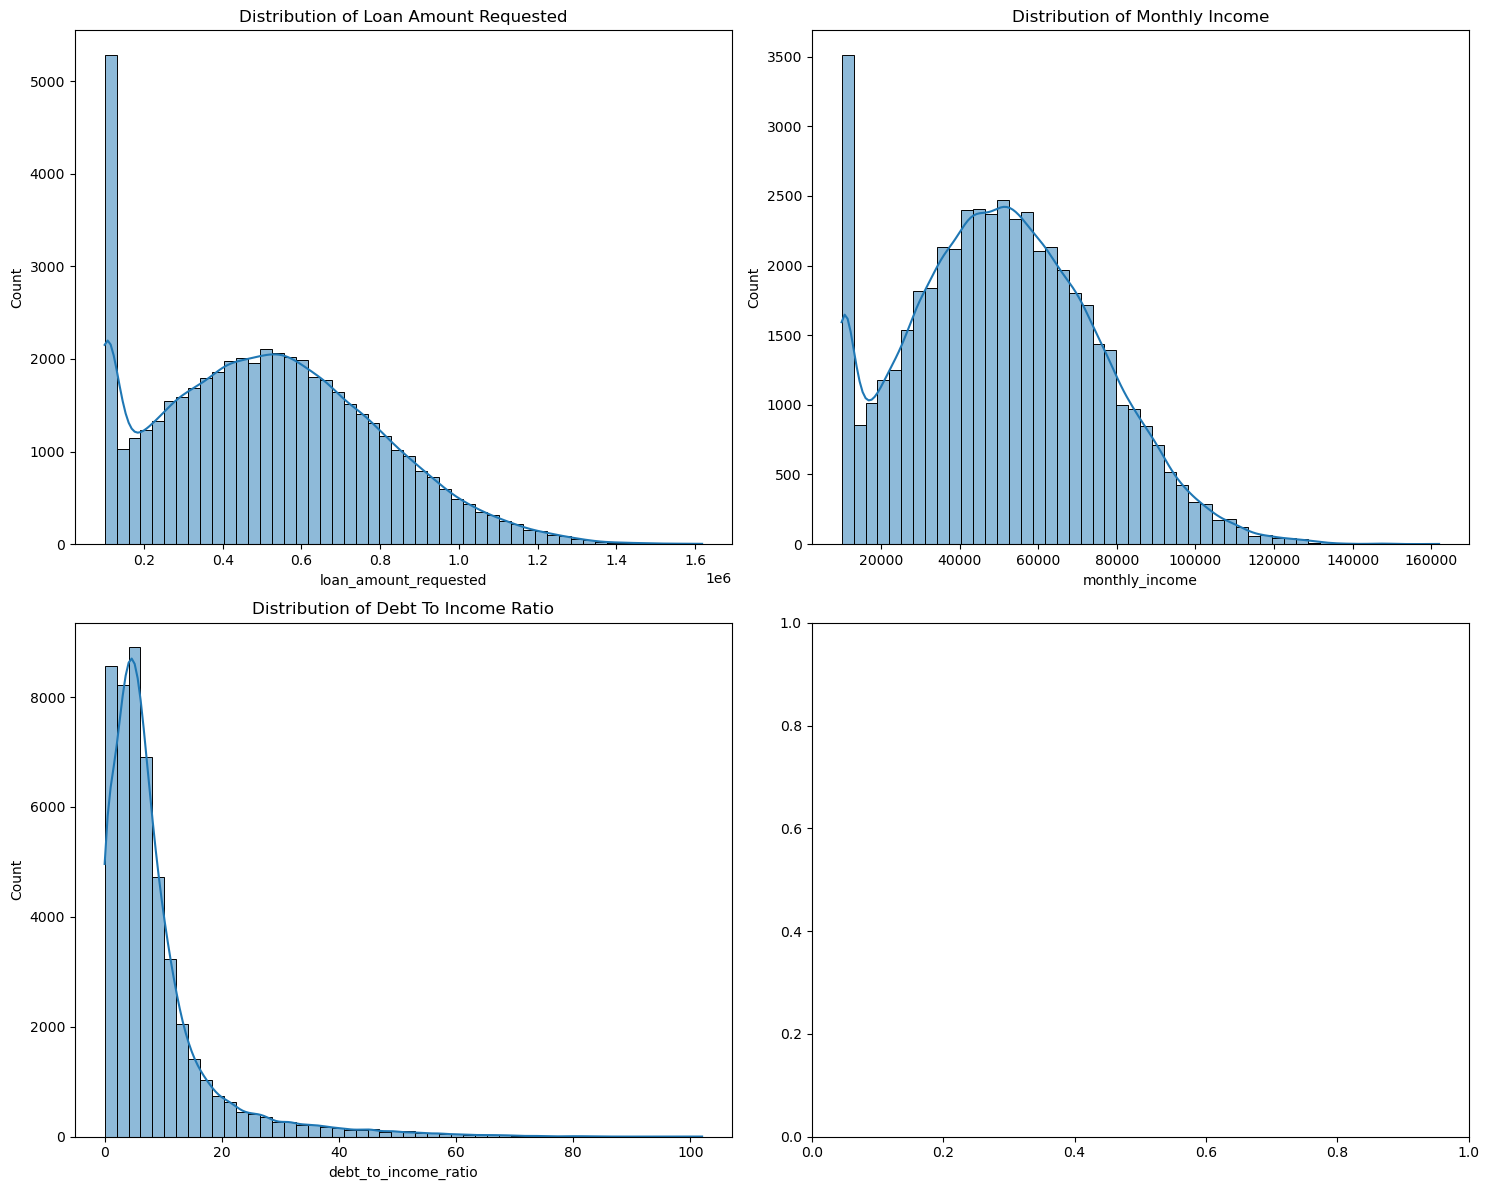

In [88]:
# Visualise distributions of continuous variables - loan applications
loan_num_vars = ["loan_amount_requested", "monthly_income", "debt_to_income_ratio"]


fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(loan_num_vars):
    sns.histplot(loan_df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

The distribution of `loan_amount_requested` and `monthly_income` is slightly right-skewed, while the distribution of `debt_to_income_ratio` is highly right-skewed.

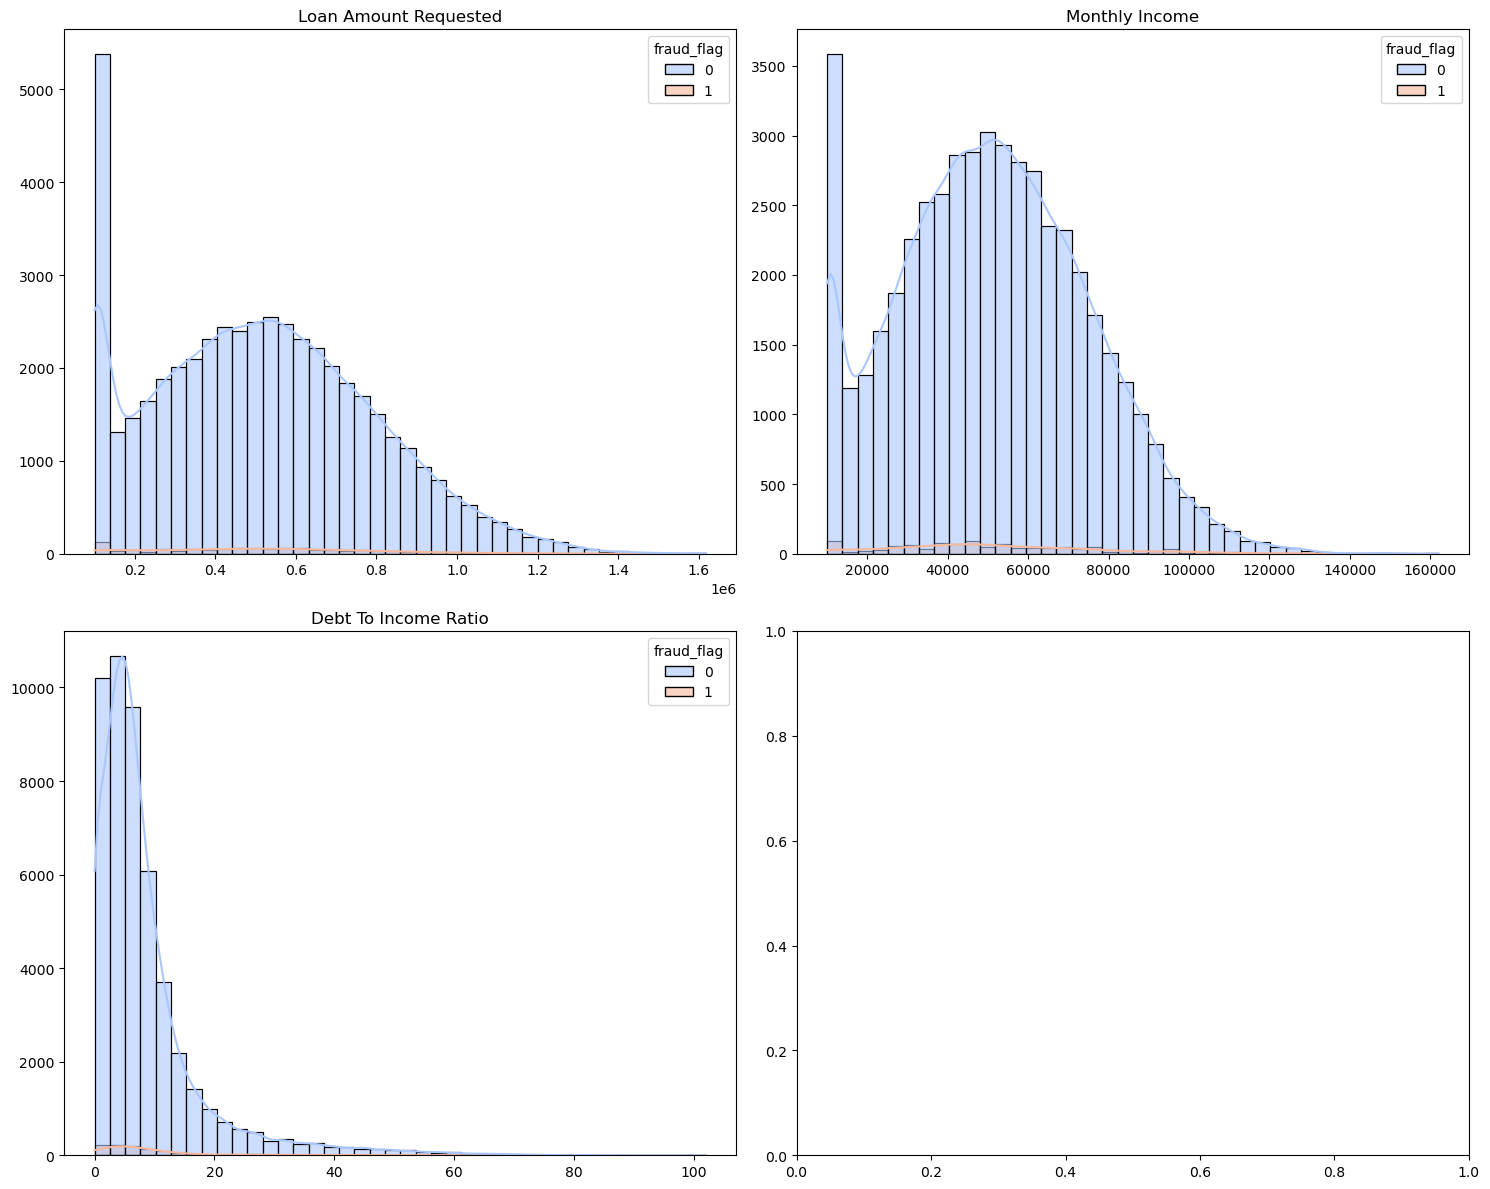

In [89]:
# Comparing distributions between fraudulent and legitimate records - loan applications
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(loan_num_vars):
    sns.histplot(
    data=loan_df, 
    x=feature, 
    hue="fraud_flag", # split by fraud/legitimate
    kde=True, # add density
    bins=40, 
    palette="coolwarm", 
    ax=axes[i],
    alpha=0.6)
    
    axes[i].set_title(feature.replace("_", " ").title())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

The distribution of `loan_amount_requested`, `monthly_income` and `debt_to_income_ratio` of fraudulent activties spread uniformly across the scale, with no specific regions that these values fall under.

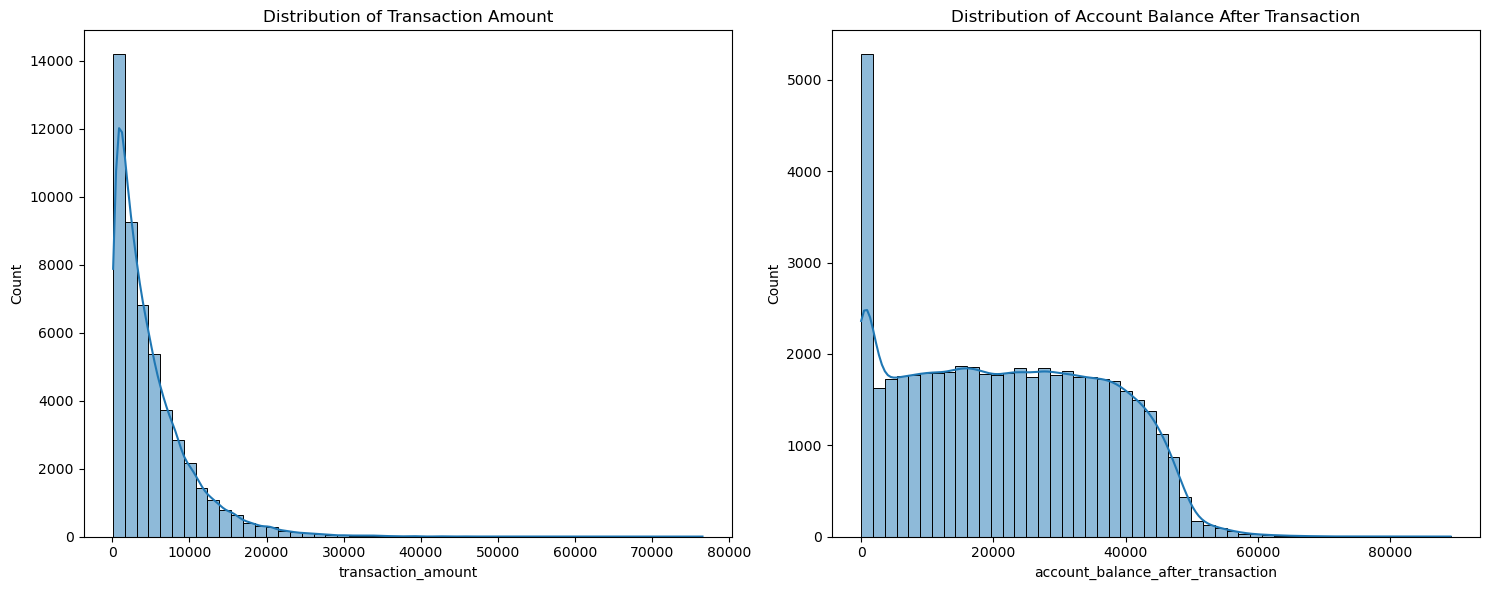

In [90]:
# Visualise distributions of continuous variables - transactions
txn_num_vars = ["transaction_amount", "account_balance_after_transaction"]


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()

for i, col in enumerate(txn_num_vars):
    sns.histplot(txn_df[col], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

The distribution of `transaction_amount` is highly right-skewed, while the distribution of `account_balance_after_transaction` is rather uniform.

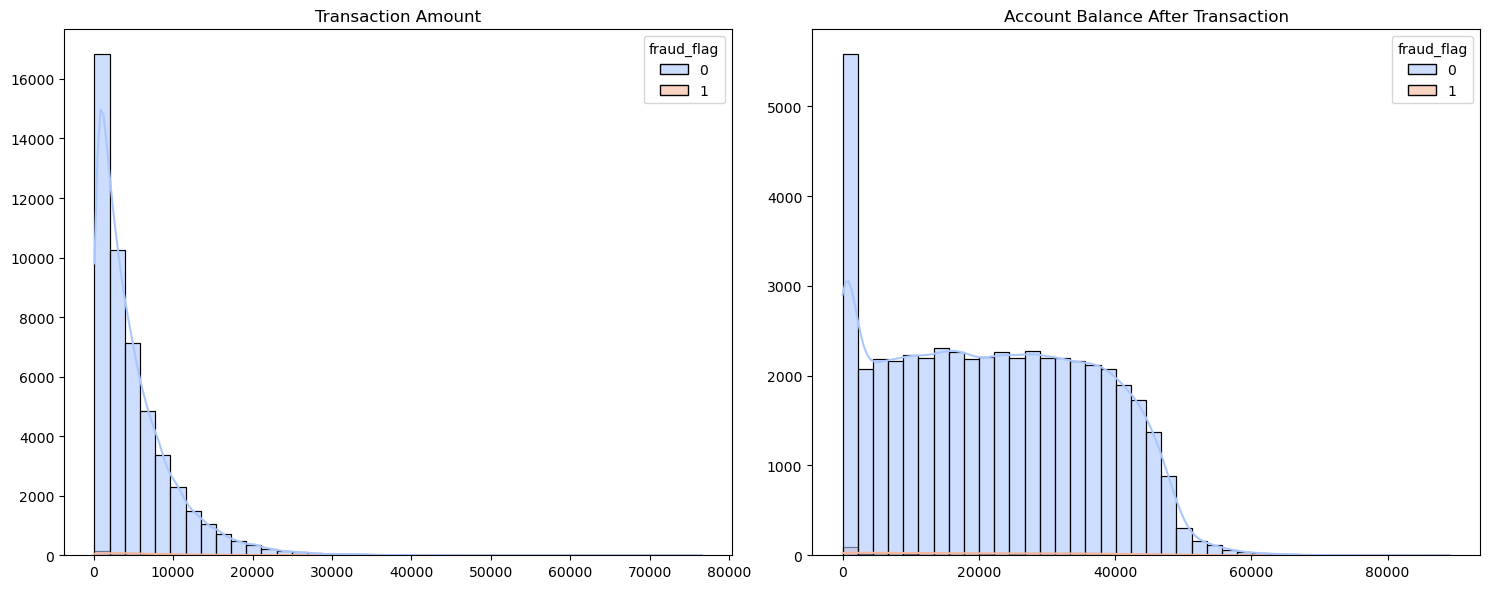

In [91]:
# Comparing distributions between fraudulent and legitimate records - transactions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
axes = axes.flatten()

# Plot each feature
for i, feature in enumerate(txn_num_vars):
    sns.histplot(
    data=txn_df, 
    x=feature, 
    hue="fraud_flag", # split by fraud/legitimate
    kde=True, # add density
    bins=40, 
    palette="coolwarm", 
    ax=axes[i],
    alpha=0.6)
    
    axes[i].set_title(feature.replace("_", " ").title())
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.tight_layout()
plt.show()

The distribution of `transaction_amount` and `account_balance_after_transaction` of fraudulent activties spread uniformly across the scale, with no specific regions that these values fall under.

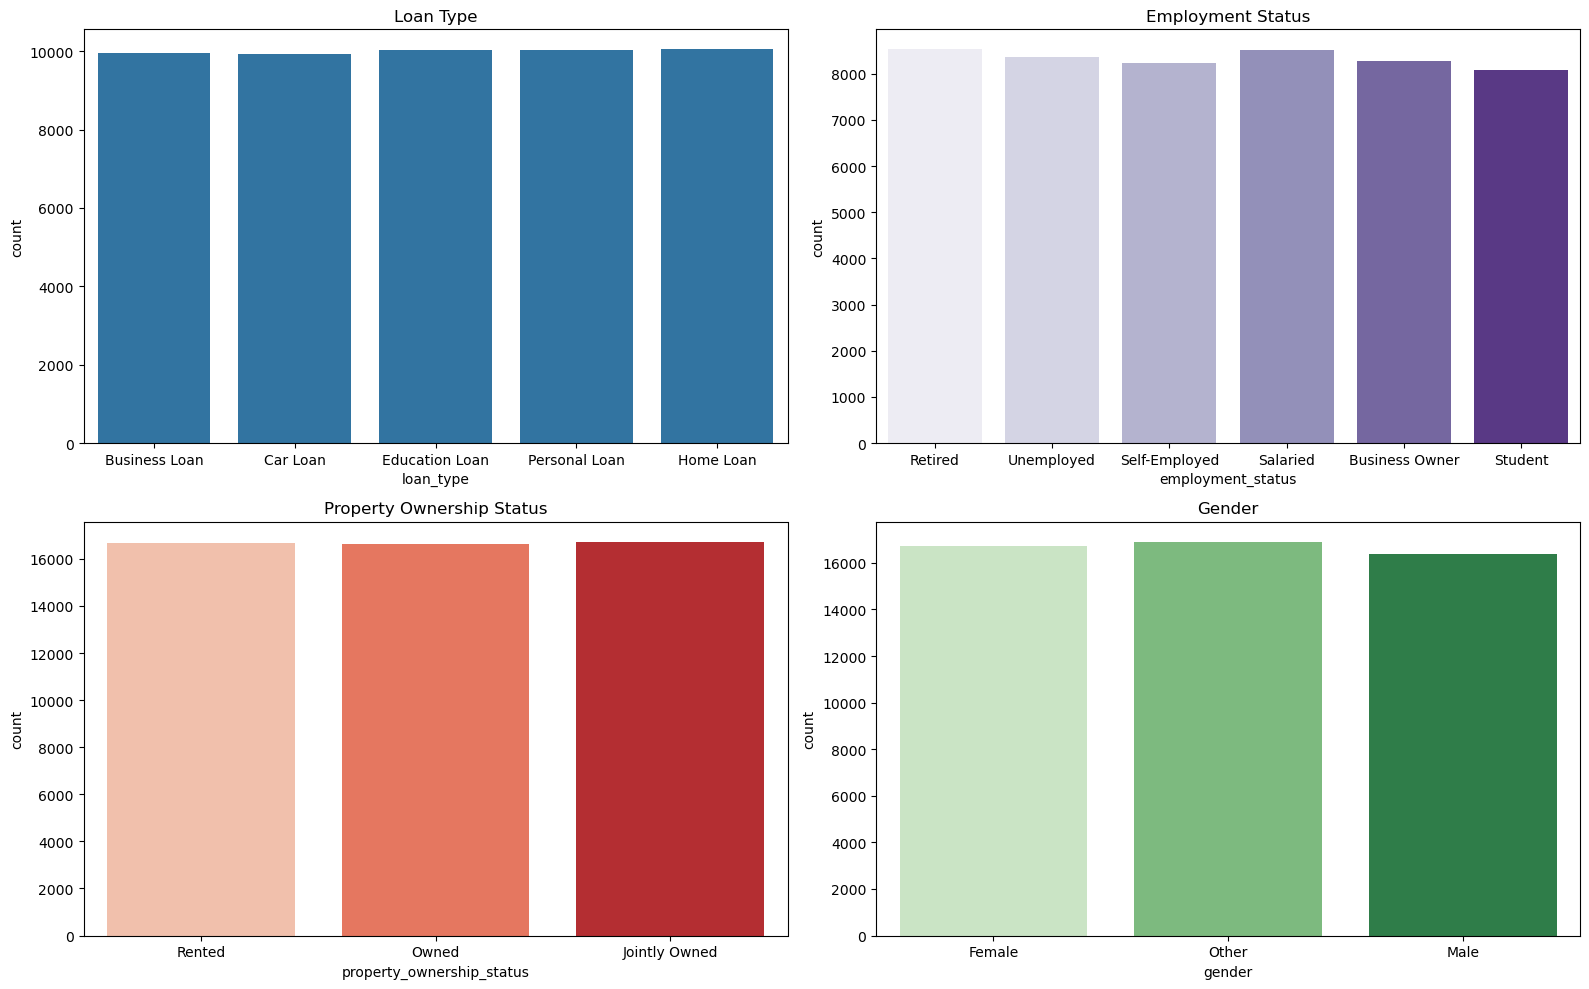

In [92]:
# Visualise distributions of categorical variable - loan applications
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

sns.countplot(x="loan_type", data=loan_df, ax=axes[0][0])
axes[0][0].set_title("Loan Type")

sns.countplot(x="employment_status", data=loan_df, hue="employment_status", ax=axes[0][1], palette="Purples")
axes[0][1].set_title("Employment Status")

sns.countplot(x="property_ownership_status", data=loan_df, hue="property_ownership_status", ax=axes[1][0], palette="Reds")
axes[1][0].set_title("Property Ownership Status")

sns.countplot(x="gender", data=loan_df, hue="gender", ax=axes[1][1], palette="Greens")
axes[1][1].set_title("Gender")

plt.tight_layout()
plt.show()

The distribution of `loan_type` is highly uniform across all five of its categories, showing equal representation. The distribution of `employment_status`, `property_ownership_status` and `gender` are relatively uniform across their respective categories.

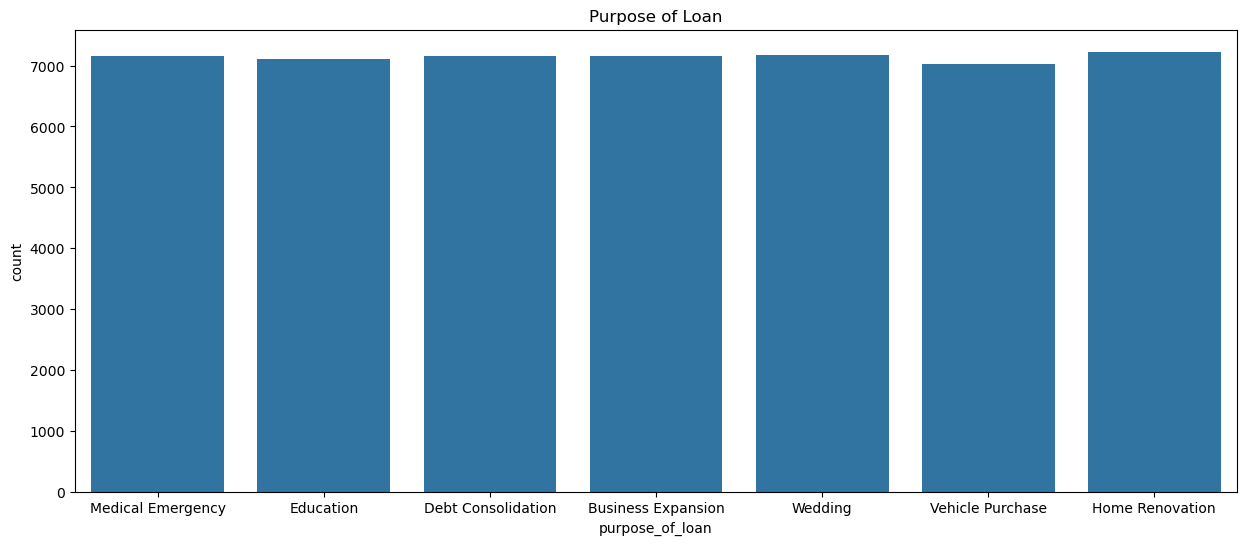

In [93]:
# Distribution of loan purpose
plt.figure(figsize=(15, 6))  
sns.countplot(x="purpose_of_loan", data=loan_df)
plt.title("Purpose of Loan")
plt.show()

The distribution of `purpose_of_loan` is also highly uniform across all its categories.

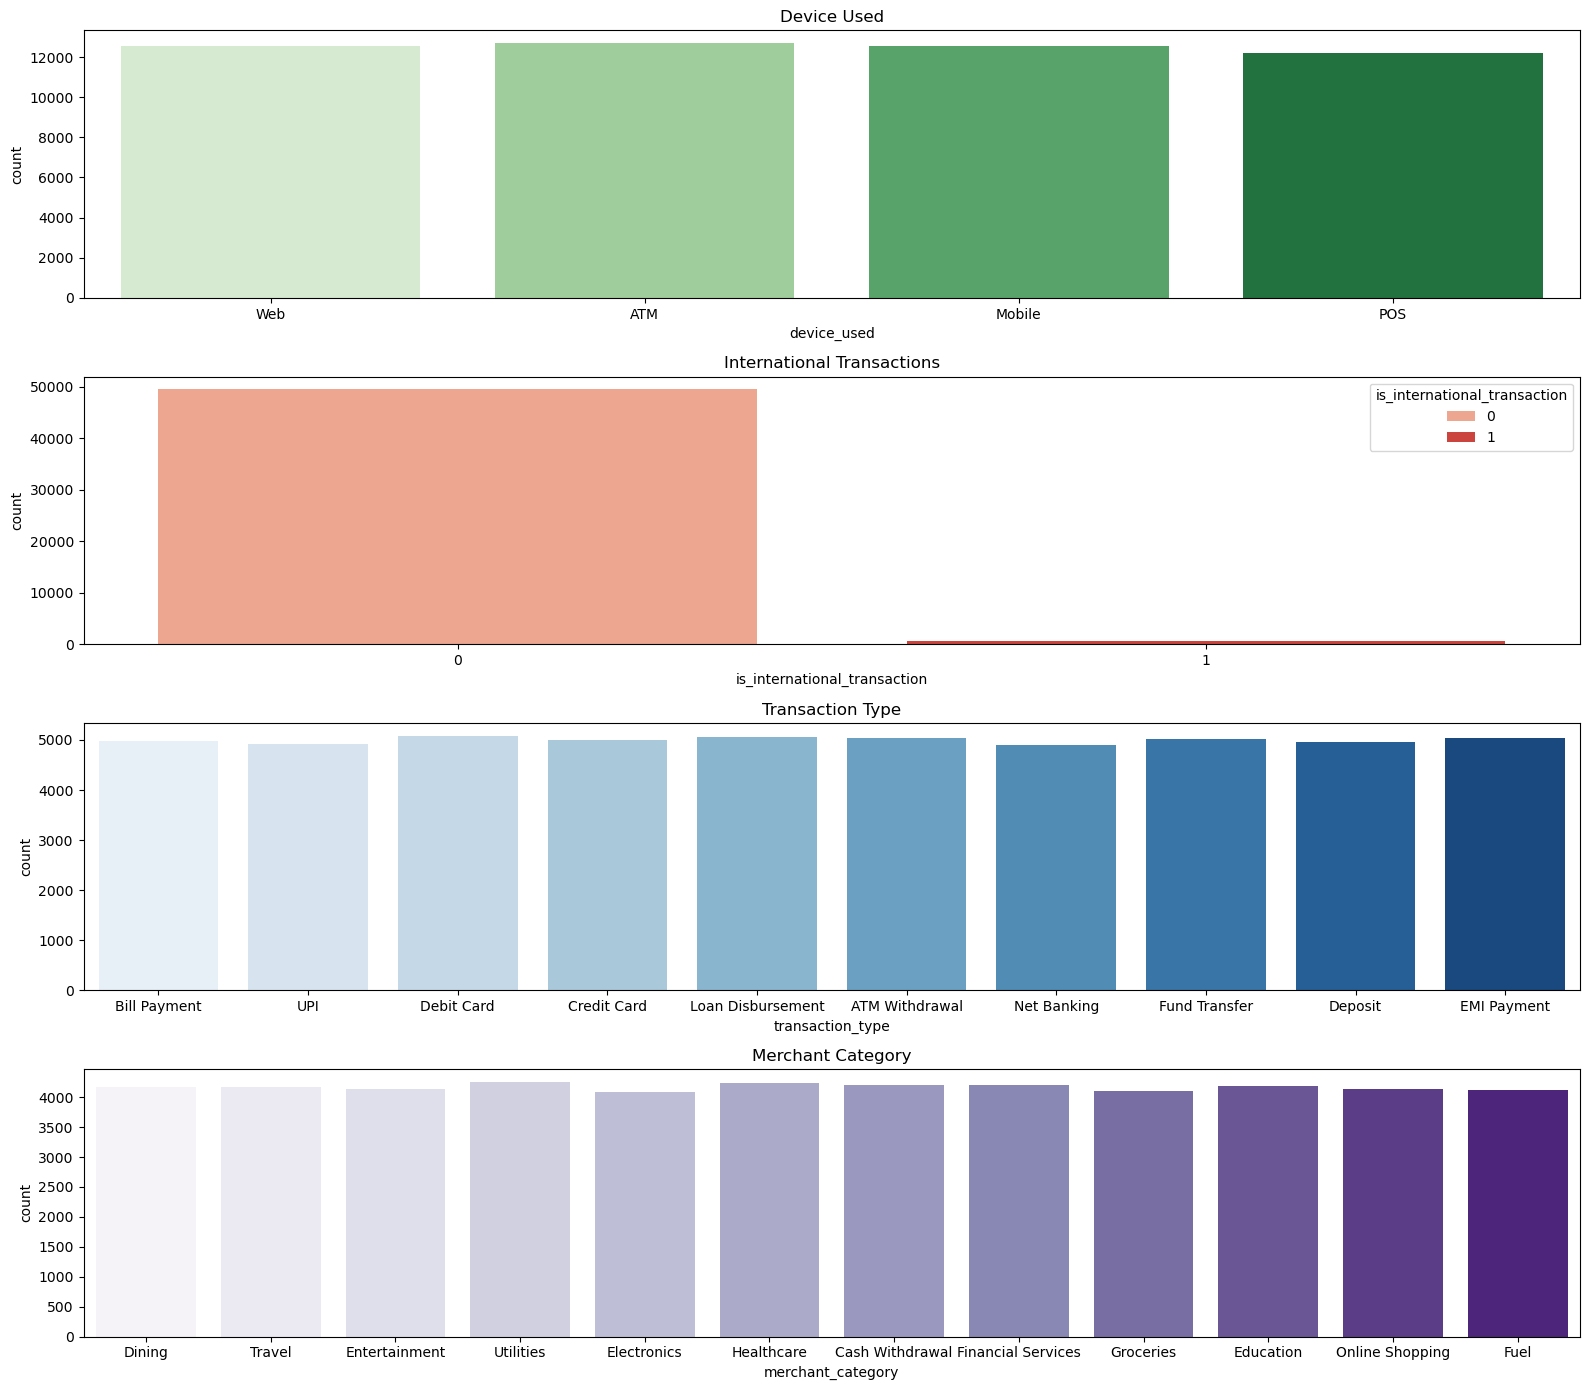

In [102]:
# Visualise distributions of categorical variable - transactions
fig, axes = plt.subplots(4, 1, figsize=(16, 14))

sns.countplot(x="device_used", data=txn_df, hue="device_used", palette="Greens", ax=axes[0])
axes[0].set_title("Device Used")

sns.countplot(x="is_international_transaction", data=txn_df, hue="is_international_transaction", palette="Reds", ax=axes[1])
axes[1].set_title("International Transactions")

sns.countplot(x="transaction_type", data=txn_df, hue="transaction_type", palette="Blues", ax=axes[2])
axes[2].set_title("Transaction Type")

sns.countplot(x="merchant_category", data=txn_df, hue="merchant_category", palette="Purples", ax=axes[3])
axes[3].set_title("Merchant Category")

plt.tight_layout()
plt.show()


The distribution across `device_used` (Web, ATM, Mobile, POS) is relatively uniform, showing balanced usage across all transaction channels. The d